In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_cwts(instances, images_per_row=10, **options):
    size = 100
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(512,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((512, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


from scipy import signal
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df, column):
    # copy the dataframe
    df_scaled = df.copy()

    df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    
    return df_scaled

In [2]:
eyes_closed_time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_matt_12-19-21_eyes_closed.csv", thousands=',')
eyes_open_time_data = pd.read_csv("C:\\Users\\mmang\\source\\repos\\MindGamesApi\\MindGamesApi\\Jupyter Notebooks\\datasets\\CWT_DATA_matt_12-19-21_eyes_open.csv", thousands=',')


#eyes_open_time_data = (eyes_open_time_data.append(eyes_open_time_data2))[:40000]
#eyes_closed_time_data = (eyes_closed_time_data.append(eyes_closed_time_data2))[:40000]

eyes_open_time_data = pd.DataFrame(eyes_open_time_data)
eyes_closed_time_data = pd.DataFrame(eyes_closed_time_data)

#eyes_open_time_data = maximum_absolute_scaling(eyes_open_time_data, eyes_open_time_data.columns[3])
#eyes_closed_time_data = maximum_absolute_scaling(eyes_closed_time_data, eyes_closed_time_data.columns[3])

eyes_open_time_data

,Channel,10-20,ChannelGroup,Volts,TimeStamp
0,1,P4,9d9f10aa-9e02-4649-b35d-7ee38616a5db,0.000003,53063
1,2,POz,9d9f10aa-9e02-4649-b35d-7ee38616a5db,0.000004,53063
2,3,PO4,9d9f10aa-9e02-4649-b35d-7ee38616a5db,0.000003,53063
3,4,O2,9d9f10aa-9e02-4649-b35d-7ee38616a5db,0.000015,53063
4,5,O1,9d9f10aa-9e02-4649-b35d-7ee38616a5db,0.000011,53063
...,...,...,...,...,...
358955,4,O2,850c16fb-8a6e-4d8e-bcef-618680354dfb,0.000016,232152
358956,5,O1,850c16fb-8a6e-4d8e-bcef-618680354dfb,0.000012,232152
358957,6,Oz,850c16fb-8a6e-4d8e-bcef-618680354dfb,-0.000006,232152
358958,7,PO3,850c16fb-8a6e-4d8e-bcef-618680354dfb,-0.000005,232152


In [3]:
compression_opts = dict(method='zip',
                        archive_name='eyes_open_time_data.csv')  

eyes_open_time_data.to_csv('eyes_open_time_data.zip', index=False,

          compression=compression_opts)  

In [4]:
fs = 250.0
lowcut = 7.0
highcut = 13.0

filtered_eyes_open_channel_data = pd.DataFrame([])
channel_group_data = eyes_open_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data:
    channel_df = pd.DataFrame(channel_group.values)
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_open_channel_data = filtered_eyes_open_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_open_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']


filtered_eyes_closed_channel_data = pd.DataFrame([])
channel_group_data2 = eyes_closed_time_data.groupby(['Channel'])
for name, channel_group in channel_group_data2:
    channel_df = pd.DataFrame(channel_group.values)
    volts = channel_df[3]
    filtered_volts = butter_bandpass_filter(list(volts), lowcut, highcut, fs)
    channel_df['Filtered Volts'] = filtered_volts
    filtered_eyes_closed_channel_data = filtered_eyes_closed_channel_data.append(channel_df)
#pd.DataFrame(filtered_channel_data)

filtered_eyes_closed_channel_data.columns = ['Channel', '10-20', 'ChannelGroup', 'Volts', 'TimeStamp', 'Filtered Volts']

In [5]:
channel_group_data_eyes_open = filtered_eyes_open_channel_data.groupby(['ChannelGroup', 'TimeStamp'])
channel_group_data_eyes_closed = filtered_eyes_closed_channel_data.groupby(['ChannelGroup', 'TimeStamp'])



In [6]:
#remove tuple ranking
period_group_cleaned = [item[1] for item in channel_group_data_eyes_closed]
period_channel_groups = pd.DataFrame([])

#make a master df of all channels for this period
for channel_group in period_group_cleaned:
    channel_group_df = pd.DataFrame(channel_group)
    period_channel_groups = period_channel_groups.append(channel_group_df)
    
#remove tuple ranking
period_group_cleaned2 = [item[1] for item in channel_group_data_eyes_open]
period_channel_groups2 = pd.DataFrame([])

#make a master df of all channels for this period
for channel_group in period_group_cleaned2:
    channel_group_df = pd.DataFrame(channel_group)
    period_channel_groups2 = period_channel_groups2.append(channel_group_df)

period_channel_groups2

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
901,1,P4,00012e7a-9fa2-4619-829d-005684813c97,0.000001,56658,-1.146182e-06
901,2,POz,00012e7a-9fa2-4619-829d-005684813c97,-0.000003,56658,-2.590135e-06
901,3,PO4,00012e7a-9fa2-4619-829d-005684813c97,0.000001,56658,-6.524090e-07
901,4,O2,00012e7a-9fa2-4619-829d-005684813c97,0.000031,56658,1.213019e-05
901,5,O1,00012e7a-9fa2-4619-829d-005684813c97,0.000015,56658,1.045333e-05
...,...,...,...,...,...,...
6200,4,O2,ffff15bf-958d-4fe3-83dc-c1cfab36817d,0.000011,77807,5.947636e-06
6200,5,O1,ffff15bf-958d-4fe3-83dc-c1cfab36817d,0.000008,77807,4.284933e-06
6200,6,Oz,ffff15bf-958d-4fe3-83dc-c1cfab36817d,0.000002,77807,-1.448907e-05
6200,7,PO3,ffff15bf-958d-4fe3-83dc-c1cfab36817d,-0.0,77807,-1.712117e-05


In [7]:
period_channel_groups

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
42803,1,P4,00009764-4451-4d87-8261-da8a8be4255c,-0.0,428577,-2.466516e-06
42803,2,POz,00009764-4451-4d87-8261-da8a8be4255c,-0.000007,428577,-5.457085e-06
42803,3,PO4,00009764-4451-4d87-8261-da8a8be4255c,-0.000001,428577,-7.975543e-06
42803,4,O2,00009764-4451-4d87-8261-da8a8be4255c,0.000003,428577,6.216024e-07
42803,5,O1,00009764-4451-4d87-8261-da8a8be4255c,0.000005,428577,3.771549e-07
...,...,...,...,...,...,...
12508,4,O2,fffd1bdd-4a47-4f6c-b53f-c88179c5d5c9,0.000021,307634,5.855646e-06
12508,5,O1,fffd1bdd-4a47-4f6c-b53f-c88179c5d5c9,0.000024,307634,3.995080e-06
12508,6,Oz,fffd1bdd-4a47-4f6c-b53f-c88179c5d5c9,0.000009,307634,-2.409337e-07
12508,7,PO3,fffd1bdd-4a47-4f6c-b53f-c88179c5d5c9,0.000007,307634,-1.721425e-06


In [8]:
period_channel_groups_sorted_eyes_closed = period_channel_groups.sort_values(['TimeStamp', 'Channel'])
period_channel_groups_sorted_eyes_open = period_channel_groups2.sort_values(['TimeStamp', 'Channel'])
period_channel_groups_sorted_eyes_closed

,Channel,10-20,ChannelGroup,Volts,TimeStamp,Filtered Volts
0,1,P4,e376e0b5-292c-4e0c-b5a5-3c1d41f3072b,-0.000003,257703,-1.593393e-08
0,2,POz,e376e0b5-292c-4e0c-b5a5-3c1d41f3072b,0.000001,257703,7.443726e-09
0,3,PO4,e376e0b5-292c-4e0c-b5a5-3c1d41f3072b,-0.000007,257703,-3.451323e-08
0,4,O2,e376e0b5-292c-4e0c-b5a5-3c1d41f3072b,-0.000008,257703,-3.871913e-08
0,5,O1,e376e0b5-292c-4e0c-b5a5-3c1d41f3072b,-0.000008,257703,-4.182116e-08
...,...,...,...,...,...,...
45737,4,O2,6936dff8-eed2-49be-9782-81a599c66e70,-0.000026,440290,-2.795033e-05
45737,5,O1,6936dff8-eed2-49be-9782-81a599c66e70,-0.000021,440290,-2.038581e-05
45737,6,Oz,6936dff8-eed2-49be-9782-81a599c66e70,0.000002,440290,6.600466e-06
45737,7,PO3,6936dff8-eed2-49be-9782-81a599c66e70,0.000006,440290,1.091721e-05


In [9]:
channels_closed = period_channel_groups_sorted_eyes_closed.groupby(['Channel'])
channels_open = period_channel_groups_sorted_eyes_open.groupby(['Channel'])

In [10]:
channels_closed

In [11]:
channel_1_data_closed = channels_closed.get_group(1)
channel_2_data_closed = channels_closed.get_group(2)
channel_3_data_closed = channels_closed.get_group(3)
channel_4_data_closed = channels_closed.get_group(4)
channel_5_data_closed = channels_closed.get_group(5)
channel_6_data_closed = channels_closed.get_group(6)
channel_7_data_closed = channels_closed.get_group(7)
channel_8_data_closed = channels_closed.get_group(8)

channel_1_data_open = channels_open.get_group(1)
channel_2_data_open = channels_open.get_group(2)
channel_3_data_open = channels_open.get_group(3)
channel_4_data_open = channels_open.get_group(4)
channel_5_data_open = channels_open.get_group(5)
channel_6_data_open = channels_open.get_group(6)
channel_7_data_open = channels_open.get_group(7)
channel_8_data_open = channels_open.get_group(8)

In [12]:
channel_1_data_closed = maximum_absolute_scaling(channel_1_data_closed, channel_1_data_closed.columns[5])
channel_2_data_closed = maximum_absolute_scaling(channel_2_data_closed, channel_2_data_closed.columns[5])
channel_3_data_closed = maximum_absolute_scaling(channel_3_data_closed, channel_3_data_closed.columns[5])
channel_4_data_closed = maximum_absolute_scaling(channel_4_data_closed, channel_4_data_closed.columns[5])
channel_5_data_closed = maximum_absolute_scaling(channel_5_data_closed, channel_5_data_closed.columns[5])
channel_6_data_closed = maximum_absolute_scaling(channel_6_data_closed, channel_6_data_closed.columns[5])
channel_7_data_closed = maximum_absolute_scaling(channel_7_data_closed, channel_7_data_closed.columns[5])
channel_8_data_closed = maximum_absolute_scaling(channel_8_data_closed, channel_8_data_closed.columns[5])

channel_1_data_open = maximum_absolute_scaling(channel_1_data_open, channel_1_data_open.columns[5])
channel_2_data_open = maximum_absolute_scaling(channel_2_data_open, channel_2_data_open.columns[5])
channel_3_data_open = maximum_absolute_scaling(channel_3_data_open, channel_3_data_open.columns[5])
channel_4_data_open = maximum_absolute_scaling(channel_4_data_open, channel_4_data_open.columns[5])
channel_5_data_open = maximum_absolute_scaling(channel_5_data_open, channel_5_data_open.columns[5])
channel_6_data_open = maximum_absolute_scaling(channel_6_data_open, channel_6_data_open.columns[5])
channel_7_data_open = maximum_absolute_scaling(channel_7_data_open, channel_7_data_open.columns[5])
channel_8_data_open = maximum_absolute_scaling(channel_8_data_open, channel_8_data_open.columns[5])

In [13]:
channel_1_data_sorted_closed = channel_1_data_closed.sort_index(0)
channel_2_data_sorted_closed = channel_2_data_closed.sort_index(0)
channel_3_data_sorted_closed = channel_3_data_closed.sort_index(0)
channel_4_data_sorted_closed = channel_4_data_closed.sort_index(0)
channel_5_data_sorted_closed = channel_5_data_closed.sort_index(0)
channel_6_data_sorted_closed = channel_6_data_closed.sort_index(0)
channel_7_data_sorted_closed = channel_7_data_closed.sort_index(0)
channel_8_data_sorted_closed = channel_8_data_closed.sort_index(0)

channel_1_data_sorted_open = channel_1_data_open.sort_index(0)
channel_2_data_sorted_open = channel_2_data_open.sort_index(0)
channel_3_data_sorted_open = channel_3_data_open.sort_index(0)
channel_4_data_sorted_open = channel_4_data_open.sort_index(0)
channel_5_data_sorted_open = channel_5_data_open.sort_index(0)
channel_6_data_sorted_open = channel_6_data_open.sort_index(0)
channel_7_data_sorted_open = channel_7_data_open.sort_index(0)
channel_8_data_sorted_open = channel_8_data_open.sort_index(0)


C:\Users\mmang\AppData\Local\Temp/ipykernel_18576/1980284862.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  channel_1_data_sorted_closed = channel_1_data_closed.sort_index(0)
C:\Users\mmang\AppData\Local\Temp/ipykernel_18576/1980284862.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  channel_2_data_sorted_closed = channel_2_data_closed.sort_index(0)
C:\Users\mmang\AppData\Local\Temp/ipykernel_18576/1980284862.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  channel_3_data_sorted_closed = channel_3_data_closed.sort_index(0)
C:\Users\mmang\AppData\Local\Temp/ipykernel_18576/1980284862.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  channel_4_data_sorted_closed = channel_4_data_closed.sort_index(0)
C:\Users\mmang\AppData\Local\Temp/ipyker

In [14]:
data_eyes_open = []

channel_1_periods_eyes_open = list(grouper(channel_1_data_sorted_open.values, 500))[:-1]
channel_2_periods_eyes_open = list(grouper(channel_2_data_sorted_open.values, 500))[:-1]
channel_3_periods_eyes_open = list(grouper(channel_3_data_sorted_open.values, 500))[:-1]
channel_4_periods_eyes_open = list(grouper(channel_4_data_sorted_open.values, 500))[:-1]
channel_5_periods_eyes_open = list(grouper(channel_5_data_sorted_open.values, 500))[:-1]
channel_6_periods_eyes_open = list(grouper(channel_6_data_sorted_open.values, 500))[:-1]
channel_7_periods_eyes_open = list(grouper(channel_7_data_sorted_open.values, 500))[:-1]
channel_8_periods_eyes_open = list(grouper(channel_8_data_sorted_open.values, 500))[:-1]

channels_eyes_open = [
    channel_1_periods_eyes_open,
    channel_2_periods_eyes_open,
    channel_3_periods_eyes_open,
    channel_4_periods_eyes_open,
    channel_5_periods_eyes_open,
    channel_6_periods_eyes_open,
    channel_7_periods_eyes_open,
    channel_8_periods_eyes_open
]

data_eyes_closed = []
channel_1_periods_eyes_closed = list(grouper(channel_1_data_sorted_closed.values, 500))[:-1]
channel_2_periods_eyes_closed = list(grouper(channel_2_data_sorted_closed.values, 500))[:-1]
channel_3_periods_eyes_closed = list(grouper(channel_3_data_sorted_closed.values, 500))[:-1]
channel_4_periods_eyes_closed = list(grouper(channel_4_data_sorted_closed.values, 500))[:-1]
channel_5_periods_eyes_closed = list(grouper(channel_5_data_sorted_closed.values, 500))[:-1]
channel_6_periods_eyes_closed = list(grouper(channel_6_data_sorted_closed.values, 500))[:-1]
channel_7_periods_eyes_closed = list(grouper(channel_7_data_sorted_closed.values, 500))[:-1]
channel_8_periods_eyes_closed = list(grouper(channel_8_data_sorted_closed.values, 500))[:-1]

channels_eyes_closed = [
    channel_1_periods_eyes_closed,
    channel_2_periods_eyes_closed,
    channel_3_periods_eyes_closed,
    channel_4_periods_eyes_closed,
    channel_5_periods_eyes_closed,
    channel_6_periods_eyes_closed,
    channel_7_periods_eyes_closed,
    channel_8_periods_eyes_closed
]



In [15]:
exampleDataFrame = pd.DataFrame(channels_eyes_closed[0][0])
exampleDataFrame

,0,1,2,3,4,5
0,1,P4,e376e0b5-292c-4e0c-b5a5-3c1d41f3072b,-3.106472e-06,257703,-0.000681
1,1,P4,bda0331d-9361-4422-8416-2a1013481da6,-5.067498e-06,257707,-0.003614
2,1,P4,9e8a1ccb-55dc-49b5-a71f-18a60f5ca334,-7.147276e-06,257711,-0.009975
3,1,P4,d79298b5-dc97-40f1-97a6-c0751d21eb38,-8.520661e-06,257715,-0.019875
4,1,P4,fc9437d4-a375-4ffb-929d-2247e99b31da,-8.098845e-06,257719,-0.032168
...,...,...,...,...,...,...
495,1,P4,5169a75d-e338-4a2e-bee3-581ead7f2251,2.170217e-06,259679,0.289997
496,1,P4,286bf452-871a-46a4-8851-68ab2e4f6b26,6.878518e-08,259683,0.244839
497,1,P4,5ff70339-704e-48f7-9928-be1461767348,-1.403849e-06,259687,0.175656
498,1,P4,42ad8acd-2c02-42ff-9c93-eb53536a3c05,-3.414986e-06,259691,0.087831


In [16]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  

exampleDataFrame.to_csv('out.zip', index=False,

          compression=compression_opts)  

In [17]:
freqs = np.fft.rfftfreq(500, d=1./250)
usefulFreqs = freqs[10:41]
usefulFreqs

array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ,
       10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5,
       16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ])

In [18]:
from numpy import fft
from sklearn.preprocessing import minmax_scale

fft_data_eyes_open = []
fft_labels_eyes_open = []

fft_data_eyes_closed = []
fft_labels_eyes_closed = []

widths = np.linspace(1.0, 15.0, 50);

for index, period in enumerate(channel_1_periods_eyes_closed):
    all_channels_cwt_flattened_closed = []
    
    flattened_volts_1 = []
    flattened_volts_2 = []
    flattened_volts_3 = []
    flattened_volts_4 = []
    flattened_volts_5 = []
    flattened_volts_6 = []
    flattened_volts_7 = []
    flattened_volts_8 = []
    
    for row in period:
        flattened_volts_1 = pd.DataFrame(channels_eyes_closed[0][index])[5]
        flattened_volts_2 = pd.DataFrame(channels_eyes_closed[1][index])[5]
        flattened_volts_3 = pd.DataFrame(channels_eyes_closed[2][index])[5]
        flattened_volts_4 = pd.DataFrame(channels_eyes_closed[3][index])[5]
        flattened_volts_5 = pd.DataFrame(channels_eyes_closed[4][index])[5]
        flattened_volts_6 = pd.DataFrame(channels_eyes_closed[5][index])[5]
        flattened_volts_7 = pd.DataFrame(channels_eyes_closed[6][index])[5]
        flattened_volts_8 = pd.DataFrame(channels_eyes_closed[7][index])[5]
            
    cwt_1 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_1, float)))))
    cwt_2 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_2, float)))))
    cwt_3 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_3, float)))))
    cwt_4 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_4, float)))))
    cwt_5 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_5, float)))))
    cwt_6 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_6, float)))))
    cwt_7 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_7, float)))))
    cwt_8 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_8, float)))))
    
    cwt_1_flattened = cwt_1[10:41].flatten()
    cwt_2_flattened = cwt_2[10:41].flatten()
    cwt_3_flattened = cwt_3[10:41].flatten()
    cwt_4_flattened = cwt_4[10:41].flatten()
    cwt_5_flattened = cwt_5[10:41].flatten()
    cwt_6_flattened = cwt_6[10:41].flatten()
    cwt_7_flattened = cwt_7[10:41].flatten()
    cwt_8_flattened = cwt_8[10:41].flatten()
    
    all_channels_cwt_flattened_closed = all_channels_cwt_flattened_closed + list(cwt_1_flattened) + list(cwt_2_flattened) + list(cwt_3_flattened) + list(cwt_4_flattened) + list(cwt_5_flattened) + list(cwt_6_flattened) + list(cwt_7_flattened) + list(cwt_8_flattened)
    
    fft_data_eyes_closed.append(all_channels_cwt_flattened_closed)

In [19]:
flattened_volts_1.size

500

In [20]:
len(fft_data_eyes_closed[0])

248

In [21]:
for index, period in enumerate(channel_1_periods_eyes_open):
    all_channels_cwt_flattened_open = []
    
    flattened_volts_1 = []
    flattened_volts_2 = []
    flattened_volts_3 = []
    flattened_volts_4 = []
    flattened_volts_5 = []
    flattened_volts_6 = []
    flattened_volts_7 = []
    flattened_volts_8 = []
    
    for row in period:
        flattened_volts_1 = pd.DataFrame(channels_eyes_open[0][index])[5]
        flattened_volts_2 = pd.DataFrame(channels_eyes_open[1][index])[5]
        flattened_volts_3 = pd.DataFrame(channels_eyes_open[2][index])[5]
        flattened_volts_4 = pd.DataFrame(channels_eyes_open[3][index])[5]
        flattened_volts_5 = pd.DataFrame(channels_eyes_open[4][index])[5]
        flattened_volts_6 = pd.DataFrame(channels_eyes_open[5][index])[5]
        flattened_volts_7 = pd.DataFrame(channels_eyes_open[6][index])[5]
        flattened_volts_8 = pd.DataFrame(channels_eyes_open[7][index])[5]
            
    cwt_1 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_1, float)))))
    cwt_2 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_2, float)))))
    cwt_3 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_3, float)))))
    cwt_4 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_4, float)))))
    cwt_5 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_5, float)))))
    cwt_6 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_6, float)))))
    cwt_7 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_7, float)))))
    cwt_8 = minmax_scale(np.absolute(np.real(fft.rfft(np.fromiter(flattened_volts_8, float)))))
    
    cwt_1_flattened = cwt_1[10:41].flatten()
    cwt_2_flattened = cwt_2[10:41].flatten()
    cwt_3_flattened = cwt_3[10:41].flatten()
    cwt_4_flattened = cwt_4[10:41].flatten()
    cwt_5_flattened = cwt_5[10:41].flatten()
    cwt_6_flattened = cwt_6[10:41].flatten()
    cwt_7_flattened = cwt_7[10:41].flatten()
    cwt_8_flattened = cwt_8[10:41].flatten()
    
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_1_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_2_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_3_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_4_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_5_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_6_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_7_flattened);
    all_channels_cwt_flattened_open = all_channels_cwt_flattened_open + list(cwt_8_flattened);
    
    fft_data_eyes_open.append(all_channels_cwt_flattened_open)

In [22]:
len(fft_data_eyes_open[0])

248

Saving figure some_cwt_plot


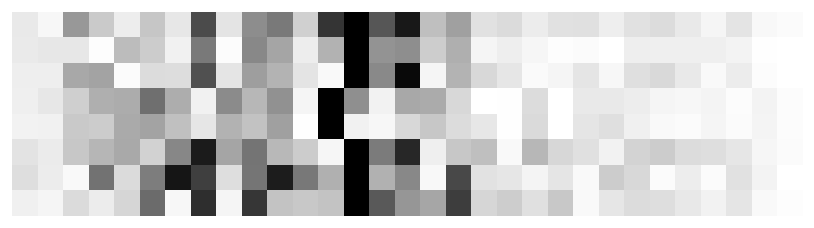

In [23]:
some_cwt = pd.DataFrame(fft_data_eyes_closed[0])
some_cwt_image = some_cwt.values.reshape(8, 31)

from matplotlib.pyplot import figure

figure(figsize=(10, 2), dpi=120)

plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

Saving figure some_cwt_plot


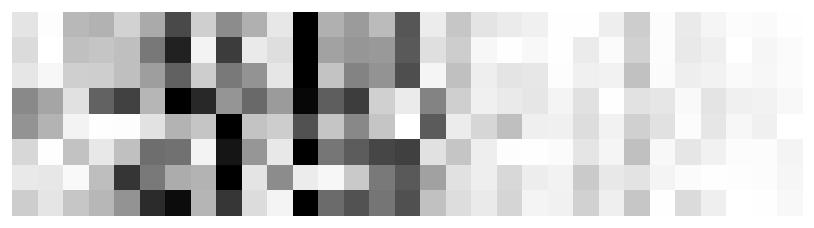

In [24]:
some_cwt = pd.DataFrame(fft_data_eyes_open[0])
some_cwt_image = some_cwt.values.reshape(8, 31)

figure(figsize=(10, 2), dpi=120)

plt.imshow(some_cwt_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_cwt_plot")
plt.show()

In [25]:
eyes_open_labels = []
eyes_closed_labels = []

for cwt_row in fft_data_eyes_open:
    eyes_open_labels.append(False)
for cwt_row in fft_data_eyes_closed:
    eyes_closed_labels.append(True)
    
eyes_open_labels = pd.DataFrame(eyes_open_labels)
eyes_closed_labels = pd.DataFrame(eyes_closed_labels)
eyes_open_labels

,0
0,False
1,False
2,False
3,False
4,False
...,...
84,False
85,False
86,False
87,False


In [26]:
cwt_data_eyes_open_df = pd.DataFrame(fft_data_eyes_open)
cwt_data_eyes_closed_df = pd.DataFrame(fft_data_eyes_closed)

mock_data = pd.concat([cwt_data_eyes_open_df, cwt_data_eyes_closed_df])
mock_data_labels = pd.concat([eyes_open_labels, eyes_closed_labels])

mock_data

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,0.110104,0.010201,0.280151,0.303449,0.178818,0.335641,0.710356,0.190539,0.453056,0.313150,...,0.057296,0.183093,0.065979,0.227391,0.007480,0.143392,0.064014,0.003649,0.007619,0.030252
1,0.043974,0.029138,0.057727,0.063476,0.422330,0.155859,0.316933,0.949514,0.417323,0.537962,...,0.000550,0.050942,0.024255,0.228789,0.000000,0.077189,0.090130,0.054258,0.034121,0.039207
2,0.096304,0.027916,0.237746,0.030727,0.520924,0.332405,0.337354,0.231594,0.048407,0.081367,...,0.239907,0.023626,0.063097,0.000677,0.081910,0.029724,0.063751,0.075453,0.000534,0.016893
3,0.119240,0.063810,0.196043,0.404391,0.229197,0.398685,0.172799,1.000000,0.057269,0.421710,...,0.036683,0.167404,0.229703,0.016824,0.085430,0.068856,0.000433,0.036358,0.021775,0.011712
4,0.150629,0.384601,0.262611,0.230199,0.561441,0.827703,0.637546,0.602594,0.188259,0.953281,...,0.369161,0.214276,0.232417,0.331427,0.082242,0.241203,0.092492,0.029657,0.074017,0.125553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.142564,0.050030,0.222038,0.491939,0.266461,0.344812,0.579421,0.159838,0.103460,0.173523,...,0.005481,0.303878,0.237684,0.070156,0.177742,0.052457,0.093332,0.068646,0.063664,0.057308
87,0.084348,0.051301,0.556654,0.098177,0.309114,0.457768,0.433620,0.033860,0.579547,0.659514,...,0.035138,0.045289,0.199232,0.165206,0.181850,0.126441,0.052097,0.013081,0.118729,0.096520
88,0.005204,0.090832,0.387608,0.297979,0.162698,0.452259,0.134065,0.218313,0.585675,1.000000,...,0.054929,0.011739,0.149115,0.019474,0.012803,0.057778,0.054326,0.044343,0.040922,0.024292
89,0.157870,0.022159,0.181491,0.417853,1.000000,0.724068,0.825567,0.000737,0.655937,0.825214,...,0.168805,0.389653,0.022535,0.092366,0.061713,0.083291,0.014444,0.059223,0.043125,0.008696


In [27]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mock_data, test_size=0.2, random_state=42)
train_set_labels, test_set_labels = train_test_split(mock_data_labels, test_size=0.2, random_state=42)

train_set_labels_eyes_closed = (train_set_labels.values.ravel() == True)
test_set_labels_eyes_closed = (test_set_labels.values.ravel() == True)

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf.fit(train_set, train_set_labels_eyes_closed)

RandomForestClassifier(random_state=42)

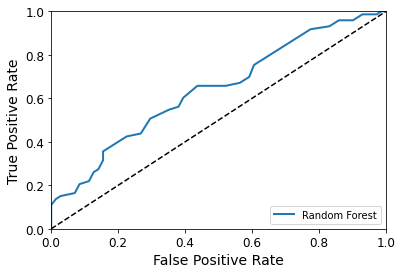

In [28]:
from sklearn.model_selection import cross_val_predict

y_probas_forest = cross_val_predict(forest_clf, train_set, train_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

from sklearn.metrics import roc_curve
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels_eyes_closed,y_scores_forest)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(train_set_labels_eyes_closed, y_scores_forest)

0.6402662550646344

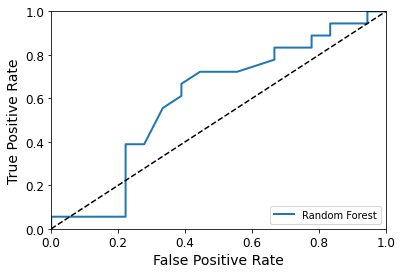

In [30]:
y_probas_forest_test = cross_val_predict(forest_clf, test_set, test_set_labels_eyes_closed, cv=3,
                                    method="predict_proba")

y_scores_forest_test = y_probas_forest_test[:, 1]   # score = proba of positive class
fpr_forest_test2, tpr_forest_test2, thresholds_forest_test2 = roc_curve(test_set_labels_eyes_closed,y_scores_forest_test)

plot_roc_curve(fpr_forest_test2, tpr_forest_test2, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [31]:
roc_auc_score(test_set_labels_eyes_closed, y_scores_forest_test)

0.5972222222222222

In [34]:
import joblib

#joblib.dump(forest_clf, "forest_clf_matt_eyes_closed_12-19-21.pkl")

['forest_clf_matt_eyes_closed_12-19-21.pkl']

In [33]:
import tensorflow as tf

feature_cols = train_set

estimator = tf.estimator.DNNClassifier(
    feature_columns=[train_set, train_set_labels_eyes_closed],
    hidden_units=[1024, 512, 256])



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:


estimator.train(input_fn=input_fn_train)

In [ ]:
test_results = estimator.evaluate(test_set, test_set_labels_eyes_closed)

test_results

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
